In [ ]:
pip install util-gfsilveira

In [ ]:
import os #organizador de pasta
import numpy as np #estruturação dos dados
import matplotlib.pyplot as plt #plot gráfico
import seaborn as sns #plot gráfico
from PIL import Image #visualização de img
import pandas as pd #estruturação dos dados
from util import meus_uteis, timeProcess
import joblib #convertendo imagens em valores numéricos .gz

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (136 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree ./drive/MyDrive/teste/imagem_conjunto/ -af >> estrutura_diretorio_Eloiza_25_01_24.txt

In [ ]:
def limpa_lista_img(path_img: str) -> str:
    path_img = path_img.replace("│\xa0\xa0", "")
    path_img = path_img.replace("├──", "")
    path_img = path_img.replace("└──", "")
    path_img = path_img.replace("\n", "")
    path_img = path_img.strip()
 #   path_img = path_img.replace("./", "./data/")
    return path_img

In [ ]:
#abrindo o arquivo:
with open("/content/drive/MyDrive/teste/estrutura_diretorio_Eloiza_25_01_24.txt", "r") as file:
    lista_arquivos = file.readlines()
lista_arquivos = [limpa_lista_img(i) for i in lista_arquivos if ".tif" in i] #laço para chamar os arquivos em formato tif
#lista_arquivos #listando os 3 primeiros arquivos
len(lista_arquivos)

561

In [ ]:
lista_arquivos_gst_icam = [i for i in lista_arquivos if "/CHO-ICAM/GTS/" in i]
lista_arquivos_gst_icam_fluo = [i for i in lista_arquivos_gst_icam if "ch01.tif" in i]

print(len(lista_arquivos_gst_icam_fluo))

40


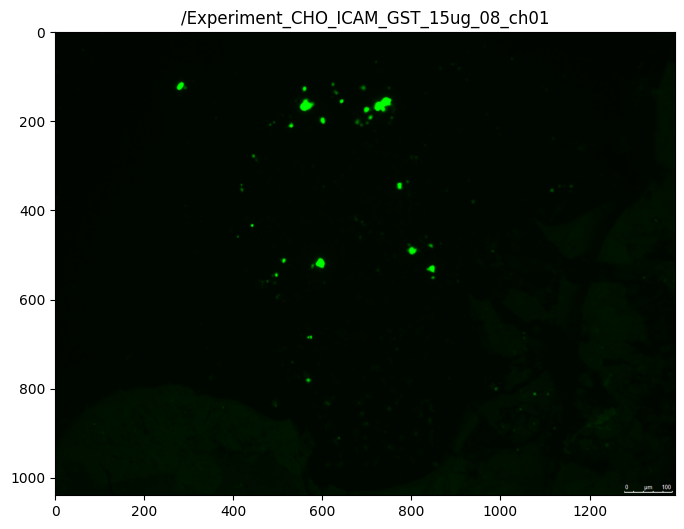

In [ ]:
path = lista_arquivos_gst_icam_fluo[12] #chamando a primeira imagem
img = Image.open(path) #abrinado a primeira imagem

plt.figure(figsize=(8,8)) #tamanho da imagem
plt.imshow(img) #abrindo a imagem
plt.title(path[50:-4]) #título recortando o nome do título que corresponde o caminho da imagem[50:-4]
plt.show()

In [ ]:
#definindo uma função que converte as imagens em matriz numpy
def img_to_df(img) -> pd.DataFrame:
  img_array = np.array(img, dtype="float64")/255 #organizando o tamanho da matriz
  img_df = pd.DataFrame(columns=["red"], data=img_array[:,:,0].reshape(-1,1)) #aqui a cor vermelha da imagem foi anulada e os valores entraram como zero na coluna da df
  img_df["green"] = img_array[:,:,1].reshape(-1,1) # mantendo apenas a camada verde (de interesse)
  img_df["blue"] = img_array[:,:,2].reshape(-1,1) #mesma coisa que foi feita na camada vermelha foi feita com a azul

  return img_df

In [ ]:
img_df = img_to_df(img=img) #chamando a função criada e como parâmetro está sendo passado a imagem organizada na pasta lá em cima.
img_df.head()

,red,green,blue
0,0.0,0.019608,0.0
1,0.0,0.019608,0.0
2,0.0,0.019608,0.0
3,0.0,0.019608,0.0
4,0.0,0.019608,0.0


#Dataframe com as imagens e valores originais

In [ ]:
img_df_orig = pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário
for path in lista_arquivos_gst_icam_fluo:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  img_df_modif = img_to_df(img=img) #retirando os outliers dos dados da df

  img_df_orig[path[61:-4]] = img_df_modif['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[61:-4]] = img_df_modif

img_df_orig.head()

,_CHO_ICAM_GST_10ug_11_ch01,_CHO_ICAM_GST_10ug_12_ch01,_CHO_ICAM_GST_10ug_13_ch01,_CHO_ICAM_GST_10ug_14_ch01,_CHO_ICAM_GST_10ug_15_ch01,_CHO_ICAM_GST_10ug_16_ch01,_CHO_ICAM_GST_10ug_17_ch01,_CHO_ICAM_GST_10ug_18_ch01,_CHO_ICAM_GST_10ug_19_ch01,_CHO_ICAM_GST_10ug_20_ch01,...,_CHO_ICAM_GST_5ug_11_ch01,_CHO_ICAM_GST_5ug_12_ch01,_CHO_ICAM_GST_5ug_13_ch01,_CHO_ICAM_GST_5ug_14_ch01,_CHO_ICAM_GST_5ug_15_ch01,_CHO_ICAM_GST_5ug_16_ch01,_CHO_ICAM_GST_5ug_17_ch01,_CHO_ICAM_GST_5ug_18_ch01,_CHO_ICAM_GST_5ug_19_ch01,_CHO_ICAM_GST_5ug_20_ch01
0,0.050980,0.015686,0.019608,0.066667,0.019608,0.015686,0.015686,0.019608,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.015686,0.031373,0.019608,0.015686,0.031373,0.019608,0.07451
1,0.050980,0.019608,0.019608,0.086275,0.019608,0.019608,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.011765,0.011765,0.015686,0.027451,0.015686,0.019608,0.023529,0.019608,0.07451
2,0.050980,0.019608,0.019608,0.078431,0.019608,0.015686,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.011765,0.027451,0.015686,0.019608,0.019608,0.019608,0.07451
3,0.047059,0.019608,0.015686,0.074510,0.019608,0.015686,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.011765,0.027451,0.019608,0.015686,0.019608,0.019608,0.07451
4,0.050980,0.019608,0.019608,0.066667,0.019608,0.019608,0.015686,0.015686,0.023529,0.019608,...,0.015686,0.015686,0.011765,0.011765,0.031373,0.015686,0.019608,0.015686,0.019608,0.07451


In [ ]:
data = timeProcess()[1]
joblib.dump(pd.DataFrame(img_df_orig), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original-dataframe-ICAM-GTS-fluorescente-'+data+'.gz')

['/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original-dataframe-ICAM-GTS-fluorescente-2024-6-4.gz']

#Criando uma função para retirada do excesso de intensidade do pixel encontrados nas imagens:

In [ ]:
img_df_green = img_df['green'].copy() #copiando apenas a coluna verde da df original
freq = img_df_green.value_counts(normalize=True).to_frame().reset_index().sort_values('green', ascending=False)
#Acima: foi calculado a frequencia dos pixels na camada verde, convertido essa serie em DF, resetado index e organizado do maior para menor valor de pixel
freq

,green,proportion
17,1.000000,0.001188
52,0.996078,0.000039
49,0.992157,0.000042
57,0.988235,0.000037
54,0.984314,0.000038
...,...,...
0,0.027451,0.328324
1,0.023529,0.245406
6,0.019608,0.030311
48,0.015686,0.000043


In [ ]:
soma = 0 #igualando a variavel a 0
for n in range(len(freq)): #iteração para percorrer na df e somar os valores da coluna 1
  soma += freq.iloc[n,1]
  if soma >= 0.001: #5% dos dados
    print(soma)
    break
print(freq.iloc[n,:])

0.001188107869142352
green         1.000000
proportion    0.001188
Name: 17, dtype: float64


In [ ]:
img_df_gst_icam = img_df.copy()

In [ ]:
# novo_valor = 0.0  # converter os valores em zero
# img_df_gst_icam.loc[img_df_gst_icam['green'] >= 0.368627, 'green'] = novo_valor
# img_df_gst_icam

In [ ]:
#Criando função pra que receba uma df, indique qual coluna usar, o valor a ser alterado e o novo valor
def filter_and_replace(dataframe, column_name, threshold, new_value):
    """
    Filtra os valores da coluna especificada na DataFrame que sejam maiores ou iguais ao limite
    especificado e substitui-os pelo novo valor.

    Args:
        dataframe (pandas.DataFrame): A DataFrame a ser filtrada e modificada.
        column_name (str): O nome da coluna que será filtrada e modificada.
        threshold (float): O valor limite para o filtro.
        new_value (float): O novo valor a ser atribuído aos valores filtrados.

    Returns:
        pandas.DataFrame: A DataFrame modificada.
    """
    dataframe.loc[dataframe[column_name] >= threshold, column_name] = new_value
    return dataframe

In [ ]:
novo_valor = 0.0
img_df_second_filtrada = filter_and_replace(img_df_gst_icam, 'green', 1.000000, novo_valor)
img_df_second_filtrada

,red,green,blue
0,0.0,0.019608,0.0
1,0.0,0.019608,0.0
2,0.0,0.019608,0.0
3,0.0,0.019608,0.0
4,0.0,0.019608,0.0
...,...,...,...
1447675,0.0,0.027451,0.0
1447676,0.0,0.027451,0.0
1447677,0.0,0.027451,0.0
1447678,0.0,0.027451,0.0


In [ ]:
def maxplot() -> float:
  if img_df.max().max() > img_df_second_filtrada.max().max():
    max = img_df.max().max()
  else:
    max = img_df_second_filtrada.max().max()

  max_freq = max/10

  return max + max_freq

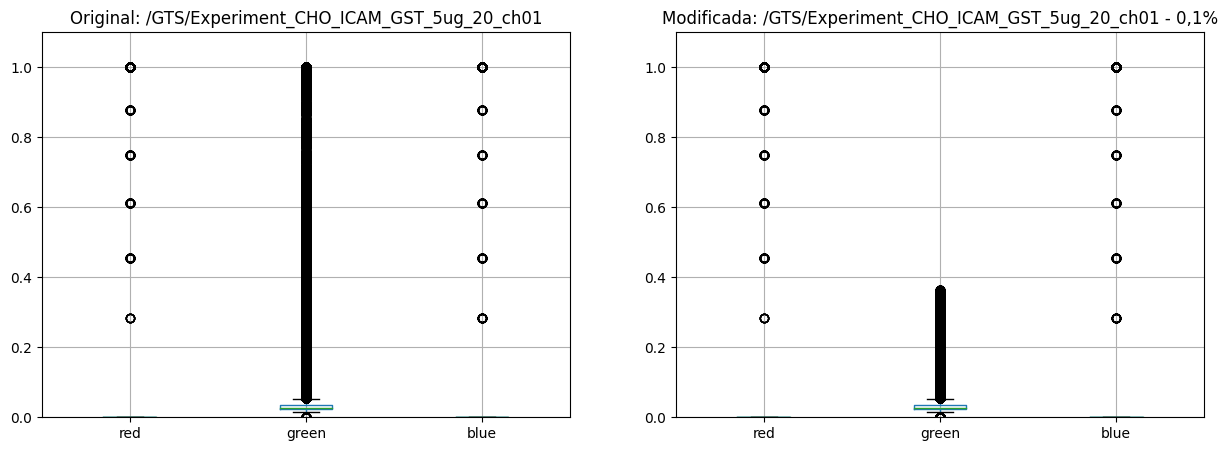

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title(f"Original: {path[46:-4]}")
img_df.boxplot()
plt.ylim(0, maxplot())


plt.subplot(1, 2, 2)
plt.title(f"Modificada: {path[46:-4]} - 0,1%")
img_df_second_filtrada.boxplot()
plt.ylim(0, maxplot())

plt.show()

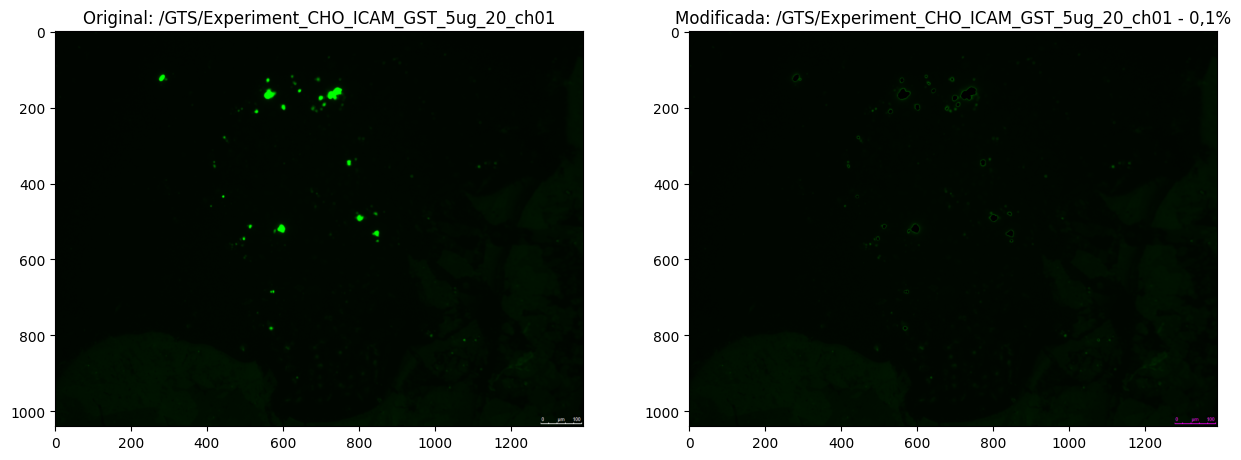

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_df).reshape(1040, 1392, 3))
plt.title(f"Original: {path[46:-4]}")

plt.subplot(1, 2, 2)
plt.imshow(np.array(img_df_second_filtrada).reshape(1040, 1392, 3))
plt.title(f"Modificada: {path[46:-4]} - 0,1%")

# plt.subplot(1, 2, 3)
# plt.imshow(np.array(img_df_copy).reshape(1040, 1392, 3))
# plt.title(f"Modificada: {path[50:-4]}")
plt.show()

#Dataframe ICAM GST Filtrada:

In [ ]:
img_df_grupo = pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário

for path in lista_arquivos_gst_icam_fluo:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  img_df_modif = filter_and_replace(img_to_df(img=img), 'green', 0.584314, novo_valor)
  img_df_grupo[path[61:-4]] = img_df_modif['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[61:-4]] = img_df_modif

img_df_grupo.head()

,_CHO_ICAM_GST_10ug_11_ch01,_CHO_ICAM_GST_10ug_12_ch01,_CHO_ICAM_GST_10ug_13_ch01,_CHO_ICAM_GST_10ug_14_ch01,_CHO_ICAM_GST_10ug_15_ch01,_CHO_ICAM_GST_10ug_16_ch01,_CHO_ICAM_GST_10ug_17_ch01,_CHO_ICAM_GST_10ug_18_ch01,_CHO_ICAM_GST_10ug_19_ch01,_CHO_ICAM_GST_10ug_20_ch01,...,_CHO_ICAM_GST_5ug_11_ch01,_CHO_ICAM_GST_5ug_12_ch01,_CHO_ICAM_GST_5ug_13_ch01,_CHO_ICAM_GST_5ug_14_ch01,_CHO_ICAM_GST_5ug_15_ch01,_CHO_ICAM_GST_5ug_16_ch01,_CHO_ICAM_GST_5ug_17_ch01,_CHO_ICAM_GST_5ug_18_ch01,_CHO_ICAM_GST_5ug_19_ch01,_CHO_ICAM_GST_5ug_20_ch01
0,0.050980,0.015686,0.019608,0.066667,0.019608,0.015686,0.015686,0.019608,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.015686,0.031373,0.019608,0.015686,0.031373,0.019608,0.07451
1,0.050980,0.019608,0.019608,0.086275,0.019608,0.019608,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.011765,0.011765,0.015686,0.027451,0.015686,0.019608,0.023529,0.019608,0.07451
2,0.050980,0.019608,0.019608,0.078431,0.019608,0.015686,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.011765,0.027451,0.015686,0.019608,0.019608,0.019608,0.07451
3,0.047059,0.019608,0.015686,0.074510,0.019608,0.015686,0.015686,0.015686,0.019608,0.019608,...,0.015686,0.015686,0.015686,0.011765,0.027451,0.019608,0.015686,0.019608,0.019608,0.07451
4,0.050980,0.019608,0.019608,0.066667,0.019608,0.019608,0.015686,0.015686,0.023529,0.019608,...,0.015686,0.015686,0.011765,0.011765,0.031373,0.015686,0.019608,0.015686,0.019608,0.07451


In [ ]:
img_df_grupo.describe()

,_CHO_ICAM_GST_10ug_11_ch01,_CHO_ICAM_GST_10ug_12_ch01,_CHO_ICAM_GST_10ug_13_ch01,_CHO_ICAM_GST_10ug_14_ch01,_CHO_ICAM_GST_10ug_15_ch01,_CHO_ICAM_GST_10ug_16_ch01,_CHO_ICAM_GST_10ug_17_ch01,_CHO_ICAM_GST_10ug_18_ch01,_CHO_ICAM_GST_10ug_19_ch01,_CHO_ICAM_GST_10ug_20_ch01,...,_CHO_ICAM_GST_5ug_11_ch01,_CHO_ICAM_GST_5ug_12_ch01,_CHO_ICAM_GST_5ug_13_ch01,_CHO_ICAM_GST_5ug_14_ch01,_CHO_ICAM_GST_5ug_15_ch01,_CHO_ICAM_GST_5ug_16_ch01,_CHO_ICAM_GST_5ug_17_ch01,_CHO_ICAM_GST_5ug_18_ch01,_CHO_ICAM_GST_5ug_19_ch01,_CHO_ICAM_GST_5ug_20_ch01
count,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,...,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06,1.447680e+06
mean,2.685589e-02,2.423395e-02,2.592999e-02,2.505398e-02,2.542200e-02,1.839775e-02,1.955619e-02,2.330620e-02,2.397967e-02,1.938584e-02,...,1.916726e-02,1.864387e-02,1.823486e-02,1.823353e-02,1.838650e-02,2.398271e-02,2.231578e-02,2.266924e-02,2.397626e-02,2.435099e-02
std,1.826005e-02,9.902028e-03,1.029025e-02,1.180805e-02,8.953352e-03,5.310456e-03,1.558193e-02,9.050368e-03,1.287330e-02,9.742740e-03,...,1.239401e-02,9.632933e-03,9.383307e-03,7.382114e-03,8.583360e-03,1.543876e-02,7.616259e-03,1.087700e-02,1.210436e-02,1.505492e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,1.568627e-02,1.568627e-02,1.960784e-02,1.960784e-02,1.568627e-02,...,1.568627e-02,1.568627e-02,1.568627e-02,1.568627e-02,1.568627e-02,1.960784e-02,1.960784e-02,1.960784e-02,1.960784e-02,1.960784e-02
50%,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,1.960784e-02,1.960784e-02,1.960784e-02,2.352941e-02,1.960784e-02,...,1.960784e-02,1.568627e-02,1.568627e-02,1.568627e-02,1.568627e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02
75%,2.745098e-02,2.745098e-02,2.745098e-02,2.745098e-02,2.745098e-02,1.960784e-02,1.960784e-02,2.352941e-02,2.745098e-02,1.960784e-02,...,1.960784e-02,1.960784e-02,1.960784e-02,1.960784e-02,1.960784e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02,2.352941e-02
max,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.176471e-01,5.843137e-01,5.725490e-01,5.843137e-01,5.843137e-01,...,5.843137e-01,5.764706e-01,5.568627e-01,5.764706e-01,4.549020e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01,5.843137e-01


In [ ]:
data = timeProcess()[1]
joblib.dump(pd.DataFrame(img_df_grupo), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/4-dataframe-ICAM-GTS-fluorescente-0,1%-'+data+'.gz')

['/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/4-dataframe-ICAM-GTS-fluorescente-0,1%-2024-6-3.gz']